Name: Tanya Singh; Roll No.: 19562

**Q1. Create a file “people.txt” with the following data:**
    
    Age agegroup height status    yearsmarried
    21  adult    6.0    single    -1
    2   child    3      married   0
    18  adult    5.7    married   20
    221 elderly  5      widowed   2
    34  child    -7     married   3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**i) Read the data from the file “people.txt”.**

In [2]:
data = open('people.txt','r')
for line in data.readlines():
    if line != '\n':
        print(line)

Age agegroup height status yearsmarried

21 adult 6.0 single -1

2 child 3 married 0

18 adult 5.7 married 20

221 elderly 5 widowed 2

34 child -7 married 3


In [3]:
df = pd.read_csv('people.txt',sep=" ",header=0)
df

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


**ii) Create a ruleset E that contain rules to check for the following conditions:**
1. The age should be in the range 0-150.
2. The age should be greater than yearsmarried.
3. The status should be married or single or widowed.
4. If age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup should be adult, if age is more than 65 the agegroup should be elderly.

In [4]:
E = ['The age should be in the range 0-150.',
     'The age should be greater than yearsmarried.',
     'The status should be married or single or widowed.',
     'If age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup should be adult, if age is more than 65 the agegroup should be elderly.']

for rules in E:
    print(rules,'\n')

The age should be in the range 0-150. 

The age should be greater than yearsmarried. 

The status should be married or single or widowed. 

If age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup should be adult, if age is more than 65 the agegroup should be elderly. 



**iii) Check whether ruleset E is violated by the data in the file people.txt.**

In [5]:
rule_b = [0, 0, 0, 0]

for r in df.iterrows():
    if r[1][0] < 0 or r[1][0] > 150: 
        rule_b[0] += 1
    if r[1][0] <= r[1][4]:
        rule_b[1] += 1
    if r[1][3] not in ['single','married','widowed']:
        rule_b[2] += 1
    if (r[1][0] < 18 and r[1][1] != 'child') or (r[1][0] >= 18 and r[1][0] <= 65 and r[1][1] != 'adult') or (r[1][0] > 65 and r[1][1] != 'elderly'):
        rule_b[3] += 1

if sum(rule_b) > 0:
    print("Ruleset E is violated\n")
else:
    print("Ruleset E is not violated\n")
    
print('Rule 1:', rule_b[0])
print('Rule 2:', rule_b[1])
print('Rule 3:', rule_b[2])
print('Rule 4:', rule_b[3])

Ruleset E is violated

Rule 1: 1
Rule 2: 1
Rule 3: 0
Rule 4: 1


**iv) Summarize the results obtained in part (iii)**

1. Rule 1 : The age should be in the range 0-150.
    - violated in row 3 where Age = 221
2. Rule 2 : The age should be greater than yearsmarried.
    - violated in row 2 where Age(i.e. 18) < yearsmarried(i.e. 20)
3. Rule 3 : The status should be married or single or widowed. 
    - Not violated
4. Rule 4 : If age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup should be adult, if age is more than 65 the agegroup should be elderly.
    - violated in row 4 where Age = 34 and agegroup = 'child'

**v) Visualize the results obtained in part (iii)**

<BarContainer object of 4 artists>

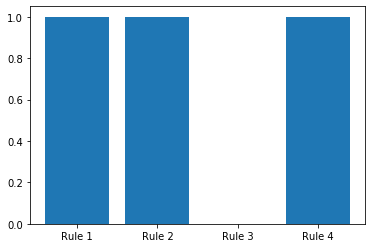

In [6]:
plt.bar(['Rule 1', 'Rule 2', 'Rule 3', 'Rule 4'], rule_b)